In [5]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

replicating local resources


In [6]:
!mkdir -p ./local/datasets/
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo" -O local/datasets/Dataset_JPV.zip && rm -rf /tmp/cookies.txt

--2020-10-21 18:27:00--  https://docs.google.com/uc?export=download&confirm=gJx7&id=15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo
Resolving docs.google.com (docs.google.com)... 108.177.119.113, 108.177.119.138, 108.177.119.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-24-docs.googleusercontent.com/docs/securesc/noc47gaf15j41ar0ras28kpmrb50jsi2/12ipvriht3ltjs2jvpg3uaf143hj68lm/1603304775000/14059520846711589950/14717031443148482368Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download [following]
--2020-10-21 18:27:00--  https://doc-14-24-docs.googleusercontent.com/docs/securesc/noc47gaf15j41ar0ras28kpmrb50jsi2/12ipvriht3ltjs2jvpg3uaf143hj68lm/1603304775000/14059520846711589950/14717031443148482368Z/15OCV9UbTR7k8ks-TDcC93r3bjhrG3xvo?e=download
Resolving doc-14-24-docs.googleusercontent.com (doc-14-24-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Conne

In [7]:
import tensorflow as tf
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from local.lib import mlutils # no se logro instalar las utilidades
import pickle, bz2
from skimage import io
%matplotlib inline

In [22]:
!pwd

/content


In [32]:
dataset_dir="./local/datasets/Dataset_JPV.zip"
#dataset_dir="./local/"
import zipfile
def unzip_leaf_dataset():

    with zipfile.ZipFile(dataset_dir, 'r') as zip_ref:
        zip_ref.extractall()
    
    #os.remove(dataset_dir+"leaf.zip")

In [33]:
unzip_leaf_dataset()

In [8]:
!unzip -o "./local/datasets/Dataset_JPV.zip" -d Dataset_JPV > /dev/null
#!unzip -o stage1_train.zip -d stage1_train > /dev/null

mapname:  conversion of  failed


In [34]:
from progressbar import progressbar as pbar
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout, Lambda
from tensorflow.keras.layers import Conv2D, Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K

import tensorflow as tf
print (tf.__version__)
# Set some parameters
IMG_WIDTH = 240
IMG_HEIGHT = 320
IMG_CHANNELS = 3
TRAIN_PATH = 'Dataset_JPV/test/x'
TEST_PATH = 'Dataset_JPV/test/x'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

2.3.0


In [35]:
import glob

In [48]:
dataset_path = os.path.join('Dataset_JPV', 'test')#chance to train
print(dataset_path)

Dataset_JPV/test


In [49]:
# load data func
import glob
from keras.preprocessing import image as kImage

def getData(dataset_dir):
    X_list= sorted(glob.glob(os.path.join(dataset_dir, 'x','*.jpg')))
    Y_list = sorted(glob.glob(os.path.join(dataset_dir, 'y' ,'*.png')))
    
    X= []
    Y= []
    for i in range(len(X_list)):
        # Load input image
        x = kImage.load_img(X_list[i])
        x = kImage.img_to_array(x)
        X.append(x)
        
        # Load ground-truth label and encode it to label 0 and 1
        y = kImage.load_img(Y_list[i], color_mode = "grayscale")#grayscale = True)
        y = kImage.img_to_array(y)
        y /= 255.0
        y = np.floor(y)# ?
        Y.append(y)
    X = np.asarray(X)
    Y = np.asarray(Y)
    
    # Shuffle the training data
    idx = list(range(X.shape[0]))
    np.random.shuffle(idx)
    X = X[idx]
    Y = Y[idx]
    return X, Y

In [50]:
X, Y = getData(dataset_path)

In [51]:
X.shape, Y.shape

((716, 240, 320, 3), (716, 240, 320, 1))

In [ ]:
#ids = np.random.permutation(len(X))[:5]
#for c,i in enumerate(ids):
#  print(c,X[i])

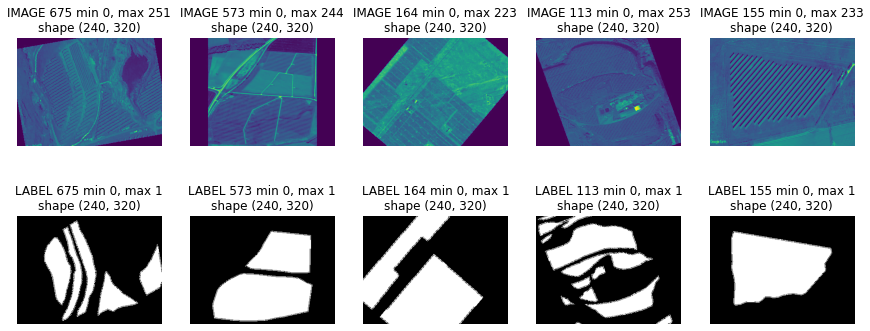

In [63]:
def show_img(img, title="", cmap=None, details=True):
    plt.imshow(img, cmap=cmap)
    if details:
        plt.title("%s min %d, max %d\nshape %s"%(title, np.min(img), np.max(img), str(img.shape)))
    else:
        plt.title(title)
    plt.axis("off")
    
plt.figure(figsize=(15,6))
ids = np.random.permutation(len(X))[:5]
for c,i in enumerate(ids):
    plt.subplot(2,5,c+1)
    show_img(X[i].mean(axis=2), "IMAGE %d"%i)
    plt.subplot(2,5,c+6)
    show_img(np.squeeze(Y[i]), "LABEL %d"%i, cmap=plt.cm.Greys_r)